In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(42)

In [21]:

cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows of the dataset:\n", data.head())

target = cancer.target

Dataset Shape: (569, 30)

First 5 rows of the dataset:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wors

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


X_scaled_df = pd.DataFrame(X_scaled, columns=cancer.feature_names)
print("\nFirst 5 rows of scaled data:\n", X_scaled_df.head())


First 5 rows of scaled data:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  

In [23]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print("\nFirst 5 rows of PCA-transformed data:\n", pca_df.head())


explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance)
print("Total Explained Variance:", explained_variance.sum())


First 5 rows of PCA-transformed data:
         PC1        PC2
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072

Explained Variance Ratio: [0.44272026 0.18971182]
Total Explained Variance: 0.6324320765155946


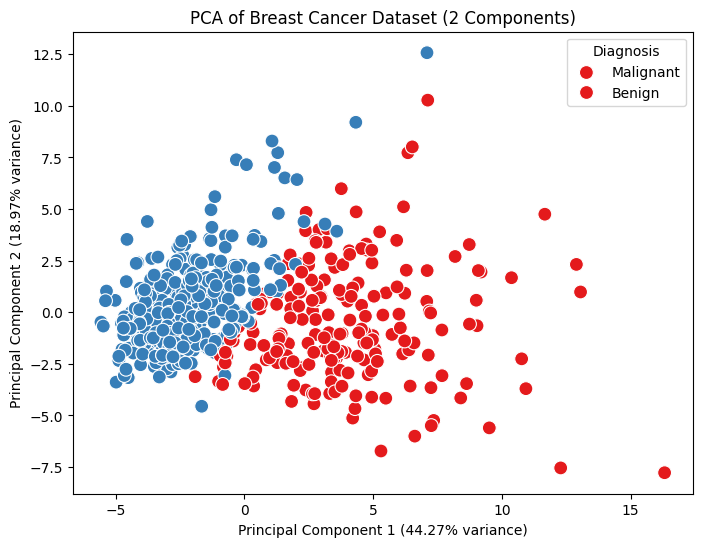

In [24]:
pca_df['Target'] = target

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['Target'], palette='Set1', data=pca_df, s=100)
plt.title('PCA of Breast Cancer Dataset (2 Components)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.legend(title='Diagnosis', labels=['Malignant', 'Benign'])
plt.show()


Component Loadings:
                               PC1       PC2
mean radius              0.218902 -0.233857
mean texture             0.103725 -0.059706
mean perimeter           0.227537 -0.215181
mean area                0.220995 -0.231077
mean smoothness          0.142590  0.186113
mean compactness         0.239285  0.151892
mean concavity           0.258400  0.060165
mean concave points      0.260854 -0.034768
mean symmetry            0.138167  0.190349
mean fractal dimension   0.064363  0.366575
radius error             0.205979 -0.105552
texture error            0.017428  0.089980
perimeter error          0.211326 -0.089457
area error               0.202870 -0.152293
smoothness error         0.014531  0.204430
compactness error        0.170393  0.232716
concavity error          0.153590  0.197207
concave points error     0.183417  0.130322
symmetry error           0.042498  0.183848
fractal dimension error  0.102568  0.280092
worst radius             0.227997 -0.219866
worst text

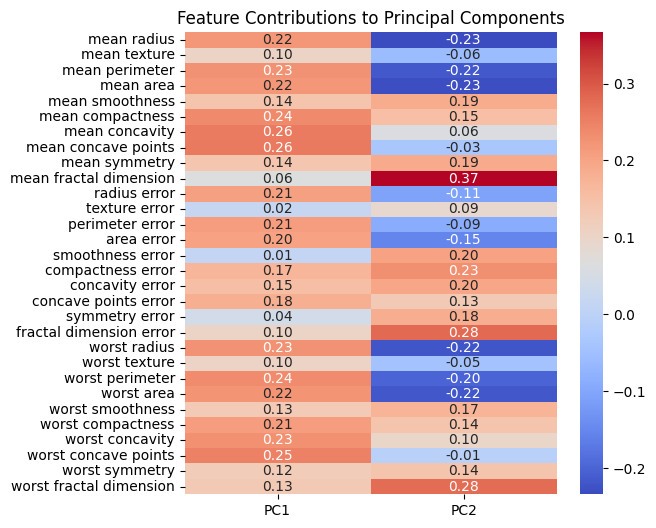

In [25]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=cancer.feature_names)
print("\nComponent Loadings:\n", loadings)


plt.figure(figsize=(6, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Contributions to Principal Components')
plt.show()

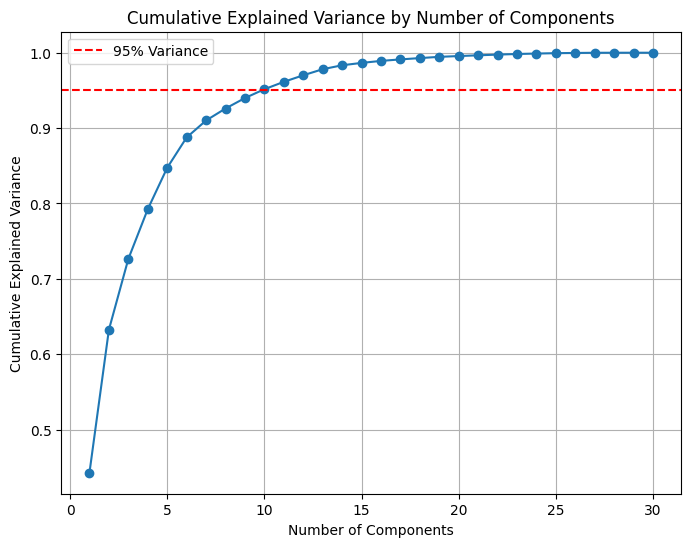

Number of components to explain 95% variance: 10


In [26]:
pca_full = PCA()
pca_full.fit(X_scaled)


cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid()
plt.show()


n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components_95}")